## Data Analysis using Pandas


For this exercise, I analyzed the data on the passengers aboard the Titanic with the purpose of identifying which passengers were more likely to survive the Titanic.

The datase was obatained from Kaggle.

## Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('TitanicData.csv')
df.set_index('PassengerId',inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Ticket    714 non-null    object 
 8   Fare      714 non-null    float64
 9   Cabin     185 non-null    object 
 10  Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.9+ KB




From the information obtained usign the describe(), and info() functions we can conclude that:

- We have a data set with 714 observations.

- Our data consist of 11 columns with different types of data between integers, floats and strings. 

- The range of ages for all passangers is between 0.42 and 80 years old. The average age of the passangers is 29 years old. 

- 75% of the passangers are 38 years old or younger (75th percentil).


## Finding how many men vs. women were on board, and how many survived in each group

In [6]:
def menvswomen(df_s):
    
    survivors = df_s[df_s['Survived']==1].groupby('Sex').size().values
    non_survivors = df_s[df_s['Survived']==0].groupby('Sex').size().values 
    
    sum_m = df_s[df_s['Sex']=='male']['Name'].count()
    sum_w = df_s[df_s['Sex']=='female']['Name'].count()
    total = sum_m+sum_w
    
    percentage_survivors = (survivors/total*100) #'{:.2F}'.format
    percentage_nonsurvivors = (non_survivors/total*100)
    
    genders = ['Female', 'Male'] 
    
    print('There were a total of {} female passengers on board from which {} survived, and a total of {} male passengers on board from which {} survived. \n\nThis means that {}% of female passengers survived agaisnt {}% of male passangers\n\n'.format(sum_w,survivors[0],sum_m,survivors[1],'{:.2F}'.format(percentage_survivors[0]),'{:.2F}'.format(percentage_survivors[1])))
    
    f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    # plot chart for count of survivors by class
    ax1.bar(range(len(survivors)), survivors, label='Survivors', alpha=0.5, color='b')
    ax1.bar(range(len(non_survivors)), non_survivors, bottom=survivors, label='Non-Survivors', alpha=0.5, color='r')
    plt.sca(ax1)
    plt.xticks([0, 1], genders)
    ax1.set_ylabel("Count")
    ax1.set_xlabel("")
    ax1.set_title("Count of survivors by gender",fontsize=14)
    plt.legend(loc='upper left')

    # plot chart for percentage of survivors by class
    ax2.bar(range(len(percentage_survivors)), percentage_survivors, alpha=0.6, color='b')
    ax2.bar(range(len(percentage_nonsurvivors)), percentage_nonsurvivors, bottom=percentage_survivors, alpha=0.6, color='r')
    plt.sca(ax2)
    plt.xticks([0, 1],  genders)
    ax2.set_ylabel("Percentage")
    ax2.set_xlabel("")
    ax2.set_title("% of survivors by gender",fontsize=14)
    

There were a total of 261 female passengers on board from which 197 survived, and a total of 453 male passengers on board from which 93 survived. 

This means that 27.59% of female passengers survived agaisnt 13.03% of male passangers




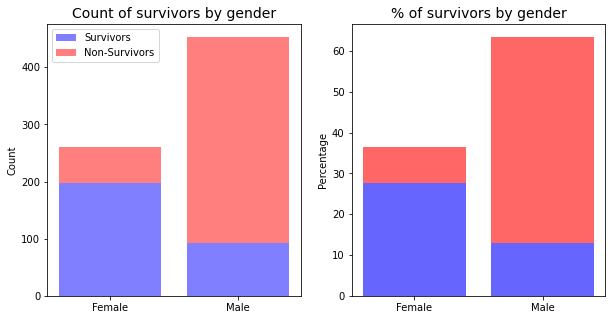

In [7]:
menvswomen(df)

## Identifying how many men vs. women were traveling with families of 3 or more members, and how many were traveling alone or in pairs 

In [8]:
df['FamilyNumber']=df['SibSp']+df['Parch']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNumber
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,5
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0


In [9]:
def menvswomen_family(df_f):
    family = df_f[df_f['FamilyNumber']>=3].groupby('Sex').size().values
    no_family = df_f[df_f['FamilyNumber']<3].groupby('Sex').size().values
    total_f = family+no_family
    
    genders = ['Female', 'Male'] 
    
    print ('There were {} female passengers travelling with a family of 3 or more members, and {} female passengers traveling alone or in pairs.\n\nThere were {} male passengers travelling with a family of 3 or more members, and {} male passengers traveling alone or in pairs.\n\n'.format(family[0],no_family[0],family[1],no_family[1]))
        
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    ax.bar(range(len(family)), family, label='Family', alpha=0.6, color='b', width = 0.5)
    ax.bar(range(len(no_family)), no_family, bottom=family, label='No Family', alpha=0.6, color='r',width = 0.5)
    plt.sca(ax)
    plt.xticks([0, 1], genders)
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    ax.set_title("Count of passengers traveling with families or alone/pair by gender",fontsize=14)
    plt.legend(loc='upper left')
    

There were 45 female passengers travelling with a family of 3 or more members, and 216 female passengers traveling alone or in pairs.

There were 33 male passengers travelling with a family of 3 or more members, and 420 male passengers traveling alone or in pairs.




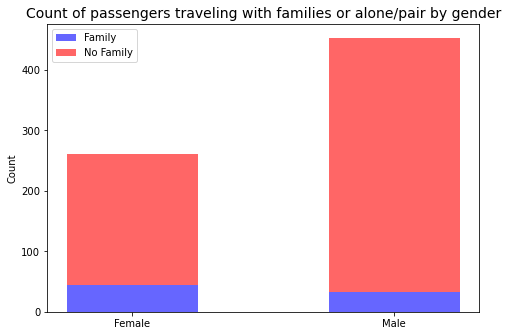

In [10]:
menvswomen_family(df)

## Count of passengers that departed from each of the 3 ports

In [11]:
df.groupby('Embarked')['Name'].nunique()

Embarked
C    130
Q     28
S    554
Name: Name, dtype: int64

## Count of passengers in each class

In [12]:
df.groupby('Pclass')['Name'].nunique()

Pclass
1    186
2    173
3    355
Name: Name, dtype: int64

## Identifying how many passengers paid high vs. low fare tickets

In [13]:
def highvslow(df_hl):
    
    high_fare=df_hl[df_hl['Fare']>df_hl['Fare'].mean()]['Name']
    low_fare=df_hl[df_hl['Fare']<=df_hl['Fare'].mean()]['Name']
    
    print('A total of {} passengers paid a high fare (> mean) for their ticket agaisnt {} passengers that paid a low fare (<= mean) for their ticket'.format(high_fare.nunique(),low_fare.nunique()))
    return high_fare.to_frame(),low_fare.to_frame()

In [14]:
highvslow(df)

A total of 172 passengers paid a high fare (> mean) for their ticket agaisnt 542 passengers that paid a low fare (<= mean) for their ticket


(                                                          Name
 PassengerId                                                   
 2            Cumings, Mrs. John Bradley (Florence Briggs Th...
 4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)
 7                                      McCarthy, Mr. Timothy J
 24                                Sloper, Mr. William Thompson
 28                              Fortune, Mr. Charles Alexander
 ...                                                        ...
 854                                  Lines, Miss. Mary Conover
 857                 Wick, Mrs. George Dennick (Mary Hitchcock)
 868                       Roebling, Mr. Washington Augustus II
 872           Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
 880              Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
 
 [172 rows x 1 columns],
                                                           Name
 PassengerId                                                   
 1           

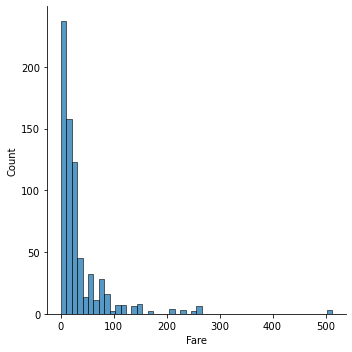

In [16]:
sns.displot(df['Fare'],bins=50)

Assuming that high fare > mean and low fare <= mean

- From the information obtained from the Fare column, we can observe that at least 75% of the passengers paid a fare of 33.375 or less, which is considered as low fare, and is also close to the mean.   

- We can conclude that around 178 passengers (25% of 714 passengers) paid for a high fare, and around 535 passengers paid for a low fare (75% of 714). 

- Morever, we can observe that at least 25% of the passengers paid 8.05 or less for their ticket, in a data set with a range between 0 - 512.3292, and a std = 52.9.  This means that we have a big spread of the data, specially in the last quartile. We could assume that some passengers  paid an excesively high fare (outliers = could be VIP tickets). 

- From the plot of the data distribution, we can observe that most passengers paid a fare lower than 100, just a very few paid over 200 dollars, and there are a couple of passangers who paid over 500 (outliers/VIP).


### Creating a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. 

In [17]:
def age_range(df_a):
    if df_a>=0 and df_a<10:
        return '0-10'
    if df_a>=10 and df_a<20:
        return '10-20'
    if df_a>=20 and df_a<30:
        return '20-30'
    if df_a>=30 and df_a<40:
        return '30-40'
    if df_a>=40 and df_a<50:
        return '40-50'
    if df_a>=50 and df_a<60:
        return '50-60'
    if df_a>=60:
        return '60+ '

In [18]:
df['AgeRange'] = df['Age'].apply(age_range)
df[['Name','Age','AgeRange']]

,Name,Age,AgeRange
PassengerId,,,
1,"Braund, Mr. Owen Harris",22.0,20-30
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,30-40
3,"Heikkinen, Miss. Laina",26.0,20-30
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,30-40
5,"Allen, Mr. William Henry",35.0,30-40
...,...,...,...
886,"Rice, Mrs. William (Margaret Norton)",39.0,30-40
887,"Montvila, Rev. Juozas",27.0,20-30
888,"Graham, Miss. Margaret Edith",19.0,10-20


### Counting how many passengers survived in each age group

In [19]:
df[df['Survived']==1].groupby('AgeRange')['Survived'].count().to_frame()

,Survived
AgeRange,
0-10,38
10-20,41
20-30,77
30-40,73
40-50,34
50-60,20
60+,7


## Additional analysis indetifying which passengers were most likely to survive, comparing differnt variables after data exploration. 

### Initial observation to choose variables to compare

<AxesSubplot:>

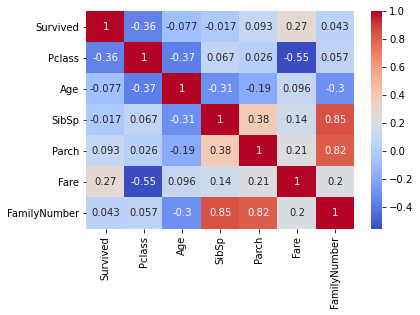

In [20]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

I decided to apply a heatmap of correlation between the numeric variables of the df, to see if there was any direct relantionship that could show a pattern of the survival. passengers Nevertheless, as observed in the plot, there is no significant correlation between the variables explored.

Then, I decided to search for the relantionship between categorical variables and survived:

#### Fare vs Sex

In [21]:
#Function to add a new column to the df classifying passengers fare between High or Low

m=df['Fare'].mean()
def fares(df_hl):
    if df_hl>m:
        return 'HighFare'
    else:
        return 'LowFare'

In [22]:
df['High/LowFare'] = df['Fare'].apply(fares)
df[['Fare','High/LowFare']]

,Fare,High/LowFare
PassengerId,,
1,7.2500,LowFare
2,71.2833,HighFare
3,7.9250,LowFare
4,53.1000,HighFare
5,8.0500,LowFare
...,...,...
886,29.1250,LowFare
887,13.0000,LowFare
888,30.0000,LowFare


In [23]:
#Getting data on the likelihood of a passenger to survive based on how much they paid for the ticket and their sex.

HLF = df[df['Survived']==1].groupby(['High/LowFare','Sex']).count() #
total_HF = df[(df['Fare']>df['Fare'].mean())]['Sex'].value_counts() #Total of females and males that paid a high fare
total_LF = df[(df['Fare']<=df['Fare'].mean())]['Sex'].value_counts() #Total of females and males that paid a low fare

In [24]:

percentage_HF_w = '{:.2F}'.format(HLF['Survived'][0]/total_HF[1]*100)
percentage_HF_m = '{:.2F}'.format(HLF['Survived'][1]/total_HF[0]*100)
percentage_LF_w = '{:.2F}'.format(HLF['Survived'][2]/total_LF[1]*100)
percentage_LF_m = '{:.2F}'.format(HLF['Survived'][3]/total_LF[0]*100)

data = {'Sex':['female','men'],'Survived HF [%]': [percentage_HF_w, percentage_HF_m], 'Survived LF [%]': [percentage_LF_w, percentage_LF_m]}
df2 = pd.DataFrame(data)
df2.set_index('Sex',inplace=True)
df2

,Survived HF [%],Survived LF [%]
Sex,,
female,94.19,66.29
men,34.88,17.17


From the data frame created above, we can observe that women who paid for a high fare were the most likely to survive, whereas men that paid for a low fare were the more likely to die. (Something that we evidence in the movie)

#### Sex vs Family number

In [25]:
df[df['FamilyNumber']>=3].groupby(['Sex','Survived'])['Name'].count()

Sex     Survived
female  0           20
        1           25
male    0           27
        1            6
Name: Name, dtype: int64

In [26]:
df[df['FamilyNumber']<3].groupby(['Sex','Survived'])['Name'].count()

Sex     Survived
female  0            44
        1           172
male    0           333
        1            87
Name: Name, dtype: int64

As seen in the data frames below There were more female and men traveling alone or in pairs that survived, than the women or man who were traveling with families of 3 or more members.

#### Age Range vs Sex

In [27]:
df[df['Survived']==1].groupby(['AgeRange','Sex'])['Survived'].count().sort_values(ascending=False).to_frame()

Survived
AgeRange Sex             
20-30    female        52
30-40    female        50
10-20    female        34
20-30    male          25
30-40    male          23
40-50    female        22
0-10     male          19
         female        19
50-60    female        16
40-50    male          12
10-20    male           7
60+      female         4
50-60    male           4
60+      male           3

## Conclusion

From the information above it is possible to conclude that women between 10 and 40 years old were the group of passangers with the most suvivors, especially young women in the range of 20-30 years old. Moreover, we can also observe that women and men of 50 or more years old was the group of range with the less survivors.